In [151]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from app.utils import DB

In [152]:
db = DB()

In [153]:
plt.style.use("dark_background")

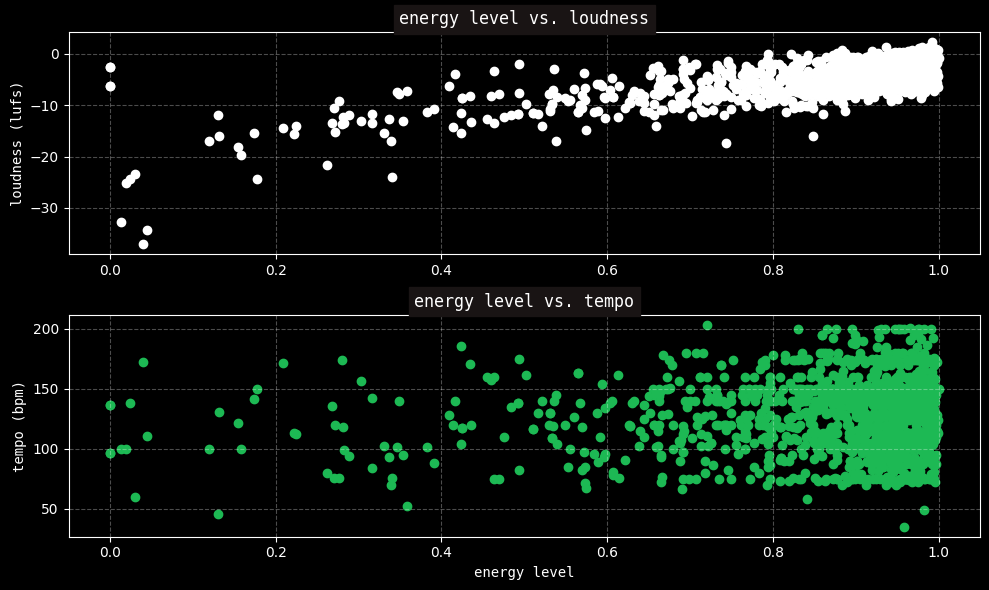

In [181]:
db.execute("SELECT * FROM track_features")
df = pd.DataFrame(db.result())
df.columns = ["track_id", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "type", "valence", "song_uri"]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

ax1.scatter(df["energy"], df["loudness"], c="#FFFFFF")
ax1.set_title("energy level vs. loudness", fontname="monospace", backgroundcolor="#191414")
ax1.set_ylabel("loudness (lufs)", fontname="monospace")

ax2.scatter(df["energy"], df["tempo"], c="#1DB954")
ax2.set_title("energy level vs. tempo", fontname="monospace", backgroundcolor="#191414")
ax2.set_xlabel("energy level", fontname="monospace")
ax2.set_ylabel("tempo (bpm)", fontname="monospace")

ax1.grid(color="#FFFFFF", linestyle='--', alpha=.3)
ax2.grid(color="#FFFFFF", linestyle='--', alpha=.3)
fig.tight_layout()

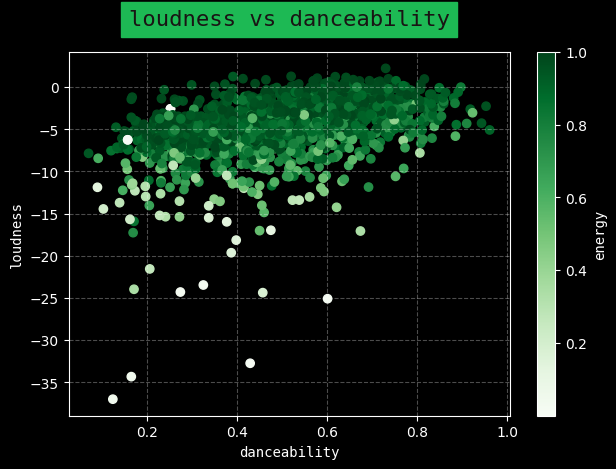

In [240]:
db.execute("SELECT * FROM track_features")
df = pd.DataFrame(db.result())
df.columns = ["track_id", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "type", "valence", "song_uri"]

plt.clf()
# fig, ax = plt.subplots(figsize=(10, 6))

plt.scatter(df["danceability"], df["loudness"], c=df["energy"], cmap="Greens")
cbar = plt.colorbar()
cbar.set_label("energy", fontname="monospace")
plt.title("loudness vs danceability", fontname="monospace", backgroundcolor="#1DB954", fontsize=16, y=1.05)
plt.xlabel("danceability", fontname="monospace")
plt.ylabel("loudness", fontname="monospace")

plt.grid(color="#FFFFFF", linestyle="--", alpha=.3)
plt.tight_layout()

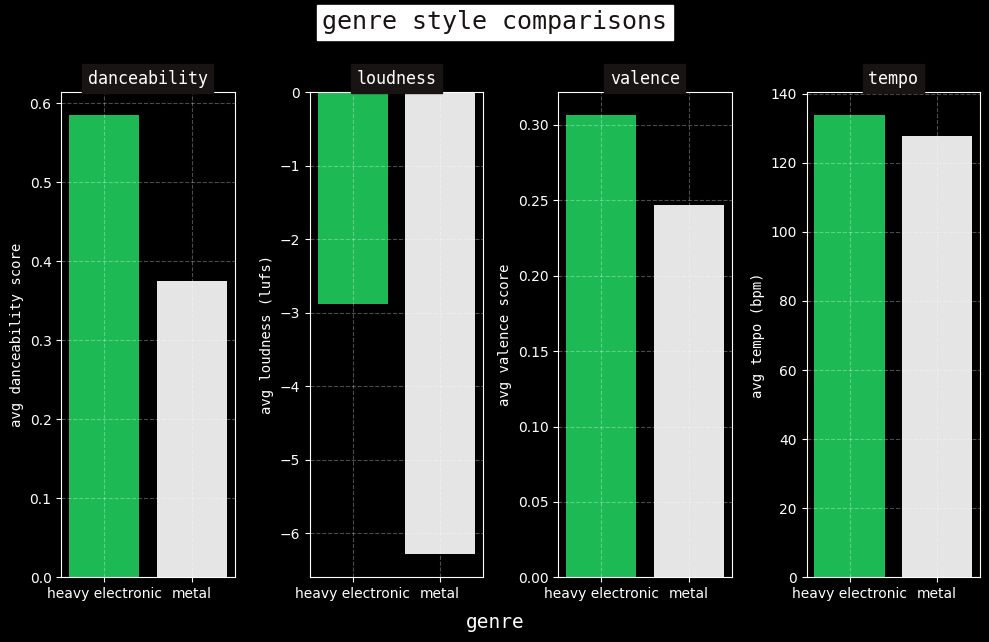

In [217]:
# GET DATA
db.execute("SELECT * FROM V_genre_features")
df = pd.DataFrame(db.result())
df.columns = ["genre", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence"]
df.sort_values("loudness", ascending=True, inplace=True)

# GROUP DATA
metal_filter = df["genre"].isin(["djent", "alternative metal", "deathcore"])
elec_filter = df["genre"].isin(["dubstep", "brostep", "deathstep", "canadian electronic"])

avg_loudness_metal = df[metal_filter]["loudness"].mean()
avg_loudness_elec = df[elec_filter]["loudness"].mean()
avg_danceability_metal = df[metal_filter]["danceability"].mean()
avg_danceability_elec = df[elec_filter]["danceability"].mean()
avg_valence_metal = df[metal_filter]["valence"].mean()
avg_valence_elec = df[elec_filter]["valence"].mean()
avg_tempo_metal = df[metal_filter]["tempo"].mean()
avg_tempo_elec = df[elec_filter]["tempo"].mean()

# PLOT DATA
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10, 6))
fig.suptitle('genre style comparisons', fontsize=18, fontname="monospace", y=1.01, backgroundcolor="#FFFFFF", color="#191414")
fig.text(0.5, -0.02, 'genre', ha='center', fontsize=14, fontname="monospace",)

ax1.bar("heavy electronic", avg_danceability_elec, color="#1DB954")
ax1.bar("metal", avg_danceability_metal, color="#FFFFFF", alpha=.9)
ax1.set_title("danceability", fontname="monospace", backgroundcolor="#191414", color="#FFFFFF")
ax1.set_ylabel("avg danceability score", fontname="monospace")
ax1.grid(color="#FFFFFF", linestyle="--", alpha=.3)

ax2.bar("heavy electronic", avg_loudness_elec, color="#1DB954")
ax2.bar("metal", avg_loudness_metal, color="#FFFFFF", alpha=.9)
ax2.set_title("loudness", fontname="monospace", backgroundcolor="#191414", color="#FFFFFF")
ax2.set_ylabel("avg loudness (lufs)", fontname="monospace")
ax2.grid(color="#FFFFFF", linestyle="--", alpha=.3)

ax3.bar("heavy electronic", avg_valence_elec, color="#1DB954")
ax3.bar("metal", avg_valence_metal, color="#FFFFFF", alpha=.9)
ax3.set_title("valence", fontname="monospace", backgroundcolor="#191414", color="#FFFFFF")
ax3.set_ylabel("avg valence score", fontname="monospace")
ax3.grid(color="#FFFFFF", linestyle="--", alpha=.3)

ax4.bar("heavy electronic", avg_tempo_elec, color="#1DB954")
ax4.bar("metal", avg_tempo_metal, color="#FFFFFF", alpha=.9)
ax4.set_title("tempo", fontname="monospace", backgroundcolor="#191414", color="#FFFFFF")
ax4.set_ylabel("avg tempo (bpm)", fontname="monospace")
ax4.grid(color="#FFFFFF", linestyle="--", alpha=.3)

plt.tight_layout()

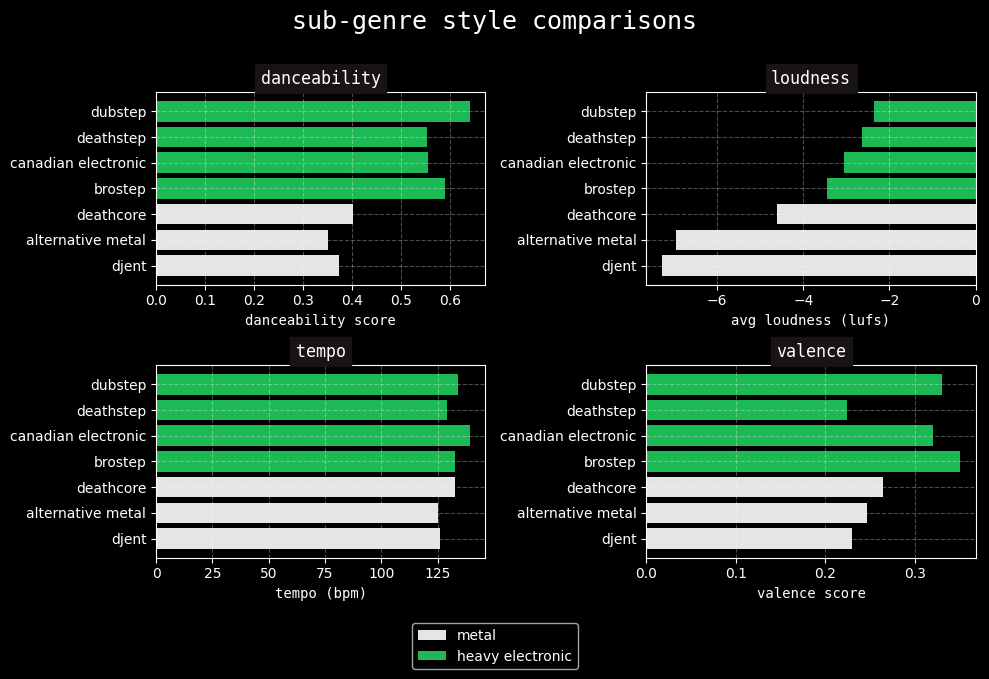

In [184]:
# GET DATA
db.execute("SELECT * FROM V_genre_features")
df = pd.DataFrame(db.result())
df.columns = ["genre", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence"]
df.sort_values("loudness", ascending=True, inplace=True)

# GROUP DATA
metal_filter = df["genre"].isin(["djent", "alternative metal", "deathcore"])
elec_filter = df["genre"].isin(["dubstep", "brostep", "deathstep", "canadian electronic"])

# PLOT DATA
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 6))
fig.suptitle('sub-genre style comparisons', fontsize=18, fontname="monospace", y=1.01)

ax1.barh(df["genre"][metal_filter], df["danceability"][metal_filter], color="#FFFFFF", label="metal", alpha=.9)
ax1.barh(df["genre"][elec_filter], df["danceability"][elec_filter], color="#1DB954", label="heavy electronic")
ax1.set_title("danceability", fontname="monospace", backgroundcolor="#191414", color="#FFFFFF")
ax1.set_xlabel("danceability score", fontname="monospace")
ax1.grid(color="#FFFFFF", linestyle="--", alpha=.3)

ax2.barh(df["genre"][metal_filter], df["loudness"][metal_filter], color="#FFFFFF", alpha=.9)
ax2.barh(df["genre"][elec_filter], df["loudness"][elec_filter], color="#1DB954",)
ax2.set_title("loudness", fontname="monospace", backgroundcolor="#191414", color="#FFFFFF")
ax2.set_xlabel("avg loudness (lufs)", fontname="monospace")
ax2.grid(color="#FFFFFF", linestyle="--", alpha=.3)

ax3.barh(df["genre"][metal_filter], df["tempo"][metal_filter], color="#FFFFFF", alpha=.9)
ax3.barh(df["genre"][elec_filter], df["tempo"][elec_filter], color="#1DB954")
ax3.set_title("tempo", fontname="monospace", backgroundcolor="#191414", color="#FFFFFF")
ax3.set_xlabel("tempo (bpm)", fontname="monospace")
ax3.grid(color="#FFFFFF", linestyle="--", alpha=.3)

ax4.barh(df["genre"][metal_filter], df["valence"][metal_filter], color="#FFFFFF", alpha=.9)
ax4.barh(df["genre"][elec_filter], df["valence"][elec_filter], color="#1DB954")
ax4.set_title("valence", fontname="monospace", backgroundcolor="#191414", color="#FFFFFF")
ax4.set_xlabel("valence score", fontname="monospace")
ax4.grid(color="#FFFFFF", linestyle="--", alpha=.3)

plt.figlegend(["metal", "heavy electronic"], loc='lower center', bbox_to_anchor=(0.5, -0.1))
plt.tight_layout()